# Analysis of Output
After running a trial, I move all output to its own directory, e.g. `build/src/smallB_n064`t

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import viscid
viscid.calculator.evaluator.enabled = True
from viscid.plot import vpyplot as vlt

%config InlineBackend.figure_format = 'retina'

In [62]:
trialpath="/Users/james/Code/cpp/PSC/psc/build/src"
trialfile="smallB_n064"

## Fields and Current

In [63]:
run = f"{trialpath}/{trialfile}/pfd.xdmf"
vf = viscid.load_file(run, force_reload=True)
print([f.name for f in vf.iter_fields()])

['jx_ec', 'jy_ec', 'jz_ec', 'ex_ec', 'ey_ec', 'ez_ec', 'hx_fc', 'hy_fc', 'hz_fc']


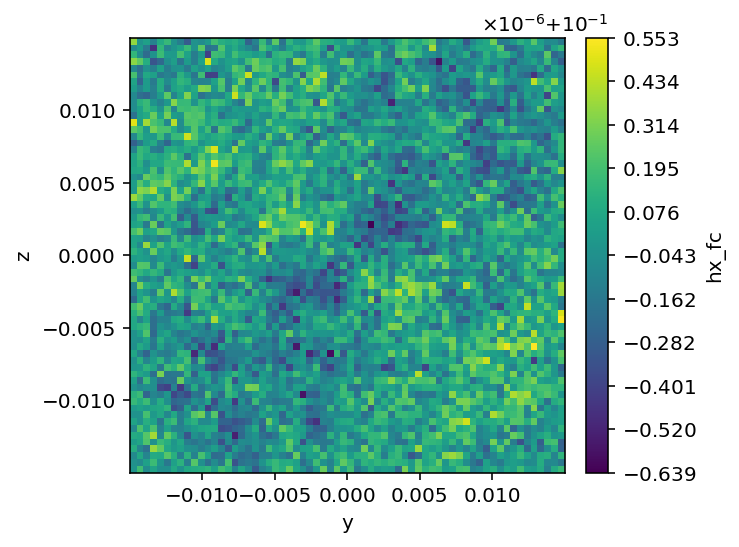

In [64]:
vf.activate_time(100)
vlt.plot(vf["hx_fc"]);

## Moments

In [65]:
run_moments = f"{trialpath}/{trialfile}/pfd_moments.xdmf"
vf_moments = viscid.load_file(run_moments, force_reload=True)
print([f.name for f in vf_moments.iter_fields()])

['rho_e', 'jx_e', 'jy_e', 'jz_e', 'px_e', 'py_e', 'pz_e', 'txx_e', 'tyy_e', 'tzz_e', 'txy_e', 'tyz_e', 'tzx_e', 'rho_i', 'jx_i', 'jy_i', 'jz_i', 'px_i', 'py_i', 'pz_i', 'txx_i', 'tyy_i', 'tzz_i', 'txy_i', 'tyz_i', 'tzx_i']


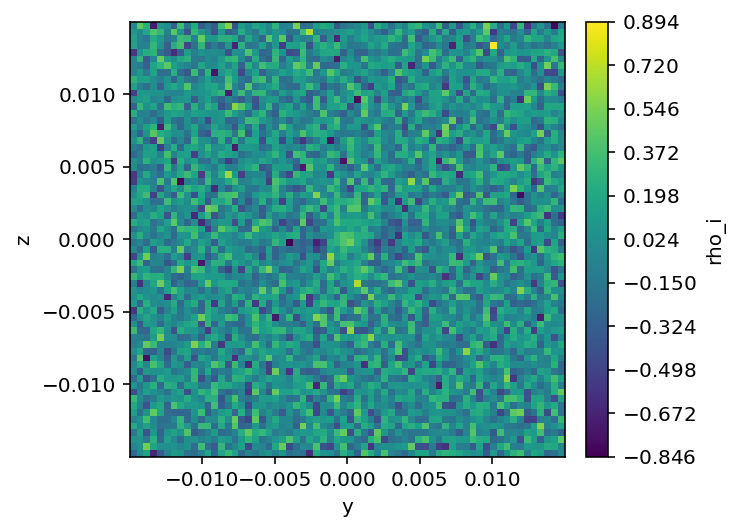

In [66]:
vf_moments.activate_time(250)
vlt.plot(vf_moments["rho_i"] + vf_moments["rho_e"]);

## Discrepancy in E

In [67]:
run_gauss = f"{trialpath}/{trialfile}/gauss.xdmf"
vf_gauss = viscid.load_file(run_gauss, force_reload=True)
print([f.name for f in vf_gauss.iter_fields()])

['rho', 'dive']


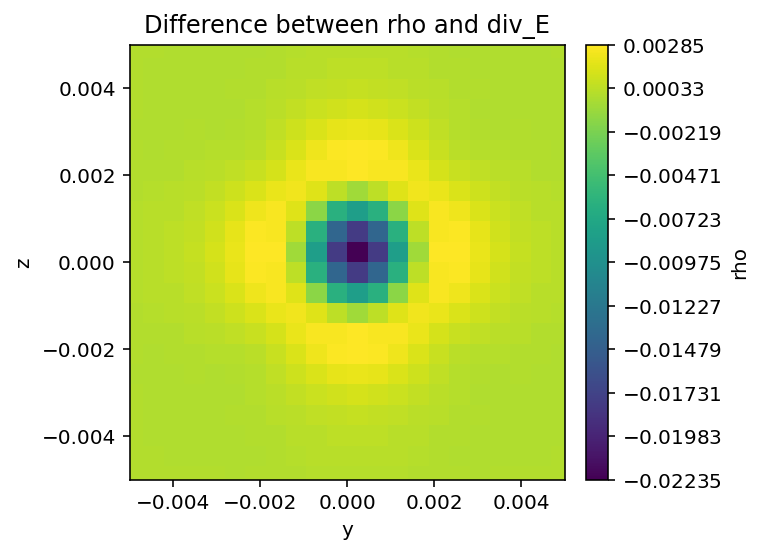

In [69]:
vf_gauss.activate_time(0)
zoom = .005
vlt.plot(vf_gauss["rho"] - vf_gauss["dive"]);
plt.title("Difference between rho and div_E")
plt.xlim(-zoom, zoom)
plt.ylim(-zoom, zoom);